## Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt

## Import

In [2]:
data=pd.read_csv('/Users/pedro/Desktop/Ironhack/Unit 07/Labs/lab-handling-data-imbalance-classification/files_for_lab/Customer-Churn.csv')

In [3]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
data.isna().sum();

In [7]:
data=data.dropna()

## Modeling

In [8]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7803837953091685
Confusion Matrix:
 [[935  98]
 [211 163]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



## Managing imbalance

In [12]:
print("Churn value counts:\n", data['Churn'].value_counts())

Churn value counts:
 No     5163
Yes    1869
Name: Churn, dtype: int64


## Resampling

In [13]:
ros=RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7303969022265246
Confusion Matrix:
 [[765 272]
 [285 744]]
Classification Report:
               precision    recall  f1-score   support

          No       0.73      0.74      0.73      1037
         Yes       0.73      0.72      0.73      1029

    accuracy                           0.73      2066
   macro avg       0.73      0.73      0.73      2066
weighted avg       0.73      0.73      0.73      2066



In [14]:
major=data[data['Churn']=='No']
minor=data[data['Churn']=='Yes']

##  Upsample minor class

In [15]:
minor_up=resample(minor, replace=False, n_samples=1869, random_state=0)
data_up=pd.concat([major,minor_up])

## Downsample major class

In [16]:
major_down=resample(major, replace=True, n_samples=1869, random_state=0)
data_down=pd.concat([major_down,minor])

## Fitting the logistic regression model on the upsampled data:

In [17]:
X_up = data_up[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y_up = data_up['Churn']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.3, random_state=0)

lr_up = LogisticRegression()
lr_up.fit(X_train_up, y_train_up)

y_pred_up = lr_up.predict(X_test_up)
accuracy_up = accuracy_score(y_test_up, y_pred_up)

print('Accuracy of upsampled data:', round(accuracy_up,5))

Accuracy of upsampled data: 0.78341


## Fitting the logistic regression model on the downsampled data:

In [18]:
X_down = data_down[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y_down = data_down['Churn']

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.3, random_state=0)

lr_down = LogisticRegression()
lr_down.fit(X_train_down, y_train_down)

y_pred_down = lr_down.predict(X_test_down)
accuracy_down = accuracy_score(y_test_down, y_pred_down)

print('Accuracy of downsampled data:', round(accuracy_down,5))

Accuracy of downsampled data: 0.7139


# <center> Cross Validation

## SMOTE for upsampling

In [19]:
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred=lr.predict(X_test)
accuracy_lr=accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression model:', round(accuracy_lr,5))

Accuracy of logistic regression model: 0.7304


In [21]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)
y_pred=dtc.predict(X_test)
accuracy_dtc=accuracy_score(y_test, y_pred)
print('Accuracy of decision tree classifier model:', round(accuracy_dtc,5))

Accuracy of decision tree classifier model: 0.8577


### Comparing the accuracies

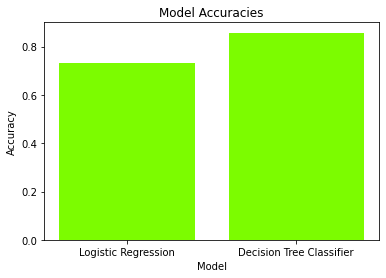

In [34]:
fig, ax = plt.subplots()
models = ['Logistic Regression', 'Decision Tree Classifier']
accuracies = [accuracy_lr, accuracy_dtc]
ax.bar(models, accuracies,color='lawngreen')
ax.set_title('Model Accuracies')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

## TomekLinks for downsampling

In [23]:
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

In [24]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression model:', round(accuracy,5))

Accuracy of logistic regression model: 0.73233


In [25]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)
y_pred=dtc.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy of decision tree classifier model:', round(accuracy,5))

Accuracy of decision tree classifier model: 0.83059


### Comparing the accuracies

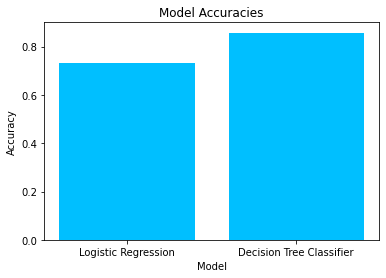

In [35]:
fig, ax = plt.subplots()
models = ['Logistic Regression', 'Decision Tree Classifier']
accuracies = [accuracy_lr,accuracy_dtc]
ax.bar(models, accuracies,color='deepskyblue')
ax.set_title('Model Accuracies')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()